In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing and Cleaning

In [48]:
def clean_data(dataframe):
    dataframe.drop(columns='Unnamed: 0', inplace=True)
    dataframe['date'] = pd.to_datetime(dataframe['date'])

    return dataframe.head(5)
    

In [49]:
def no_bedrooms(dataframe, df2):
    index=dataframe.loc[dataframe.bedrooms == 0].index.to_list()
    dataframe.drop(dataframe.index[[index]], inplace=True)
    frames= [dataframe, df2]
    dataframe = pd.concat(frames)
    print(dataframe.shape)
    return dataframe

def price_distribution(dataframe):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.hist(dataframe['price'], bins=100);
    ax.set_title('Housing Prices');

In [50]:
training_data = pd.read_csv('/Users/brendanferris/Desktop/kings_county_housing/kc_house_data_train.csv')
missing_vals = pd.read_csv('bedroomsfilled.csv')
holdout_data = pd.read_csv('/Users/brendanferris/Desktop/kings_county_housing/kc_house_data_train.csv')
clean_data(training_data)
clean_data(missing_vals)
training_data = no_bedrooms(training_data, missing_vals)
training_data

(17290, 21)


/Users/brendanferris/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexes/base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2954400190,2014-06-24,1295650.0,4,4.50,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8,3980300371,2014-09-26,142000.0,1,0.75,290,20875,1.0,0,0,...,1,290,0,1954,0,98024,47.5308,-121.888,1620,22850
9,2310060040,2014-09-25,240000.0,4,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
10,6896300380,2014-10-02,228000.0,2,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [ ]:
#extreme values

# Multicollinearity of features

In [7]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc']
    return df[(df.cc>.75) & (df.cc <1)]

In [ ]:
data_pred = training_data[['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']]

data_pred.head(5)

In [8]:
multicolinear_features(data_pred)

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(sqft_living, sqft_above)",0.876696
"(grade, sqft_living)",0.762929
"(sqft_living, grade)",0.762929
"(grade, sqft_above)",0.758247
"(sqft_above, grade)",0.758247
"(sqft_living, bathrooms)",0.755270
"(bathrooms, sqft_living)",0.755270
"(sqft_living, sqft_living15)",0.755066


# Checking relationships between features and target

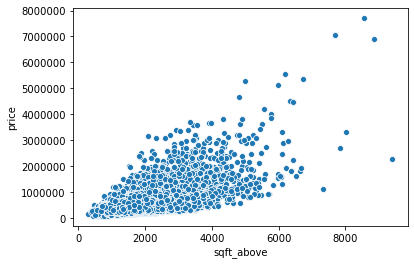

In [9]:
prices = training_data['price']
feature = training_data['sqft_above']
sns.scatterplot(feature, prices)

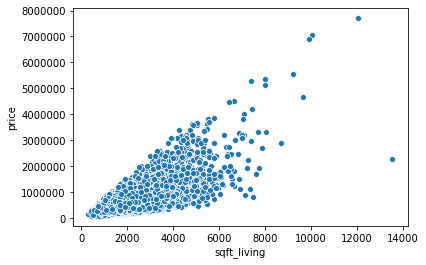

In [10]:
prices = training_data['price']
feature = training_data['sqft_living']
sns.scatterplot(feature, prices)

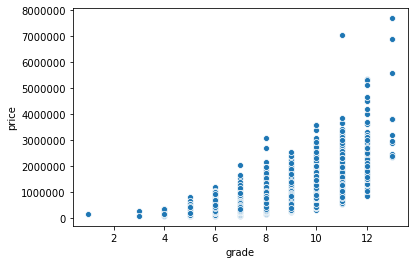

In [11]:
prices = training_data['price']
feature = training_data['grade']
sns.scatterplot(feature, prices)